## In this notebook we aretrying to find out the optimal hyperparameters in SVM for 40 time unit ahead prediction.

In [64]:
import csv
import math
import requests
import json
import csv
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [65]:
data = pd.read_csv('weather.csv')## data for may
d1 = pd.read_csv('April_w_2019.csv')
total_months = 2

In [66]:
data = pd.concat([data,d1],axis=0)

In [67]:
data = data.reset_index()
data.head()

,index,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone
0,0,2019-05-01 00:00:00,Clear,clear-night,0.0,0.0,87.71,93.85,71.33,0.58,1004.05,7.41,7.98,223,0.0,0,2.488,266.4
1,1,2019-05-01 01:00:00,Clear,clear-night,0.0,0.0,87.80,91.20,67.64,0.51,1004.13,7.82,7.82,234,0.0,0,2.488,266.4
2,2,2019-05-01 02:00:00,Clear,clear-night,0.0,0.0,88.72,90.57,64.89,0.45,1004.22,6.02,7.35,258,0.0,0,2.488,266.4
3,3,2019-05-01 03:00:00,Clear,clear-night,0.0,0.0,88.71,90.66,65.08,0.46,1004.08,5.49,7.08,266,0.0,0,2.488,266.4
4,4,2019-05-01 04:00:00,Clear,clear-night,0.0,0.0,87.78,89.89,65.48,0.48,1003.79,6.78,7.54,236,0.0,0,2.488,266.4


In [68]:
print("Total size of the dataset :",data.shape)

Total size of the dataset : (1440, 18)


In [69]:
tem = data['temperature'].values
hum = data['humidity'].values
cloud = data['cloudCover'].values
wind = data['windSpeed'].values
#windBearing = data['windBearing'].values

In [70]:
bearing = []
for v in data['windBearing'].values:
    bearing.append(v)
    bearing.append(bearing[-1])
    bearing.append(bearing[-1])

In [71]:
apptem = []
for v in data['apparentTemperature'].values:
    apptem.append(v)
    apptem.append(apptem[-1])
    apptem.append(apptem[-1])

In [72]:
dew = []
for v in data['dewPoint'].values:
    dew.append(v)
    dew.append(dew[-1])
    dew.append(dew[-1])

In [73]:
temperature = []
for v in tem:
    temperature.append(v)
    temperature.append(temperature[-1])
    temperature.append(temperature[-1])

In [74]:
windspeed = []
for v in wind:
    windspeed.append(v)
    windspeed.append(windspeed[-1])
    windspeed.append(windspeed[-1])

In [75]:
humidity = []
for v in hum:
    humidity.append(v)
    humidity.append(humidity[-1])
    humidity.append(humidity[-1])

In [76]:
cloudCover = []
for v in cloud:
    cloudCover.append(v)
    cloudCover.append(cloudCover[-1])
    cloudCover.append(cloudCover[-1])

In [77]:
len(temperature),len(humidity),len(cloudCover),len(bearing)

(4320, 4320, 4320, 4320)

## reading solar data:

In [78]:
data = pd.read_csv('xyz.csv') ##reading the data for April
d1 = pd.read_csv('MAY_B_2019.csv')

In [79]:
data = pd.concat([data,d1],axis=0)  #concating both the dataframe

In [80]:
data.shape

(60, 72)

In [81]:
data.head()

,00:00,00:20,00:40,01:00,01:20,01:40,02:00,02:20,02:40,03:00,...,20:40,21:00,21:20,21:40,22:00,22:20,22:40,23:00,23:20,Date
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-01 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-02 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-03 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-04 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-05 00:00:00


In [82]:
data = data.drop(['Date'],axis=1)
data['23:40'] = data['23:20'].values

In [83]:
dx = np.array(temperature).reshape((total_months*30, 72)) 
dy = np.array(humidity).reshape((total_months*30,72))
dz = np.array(cloudCover).reshape(total_months*30,72)
dx1 = np.array(apptem).reshape((total_months*30, 72)) 
dy1 = np.array(dew).reshape((total_months*30,72))
dz1 = np.array(windspeed).reshape(total_months*30,72)
bear = np.array(bearing).reshape(total_months*30,72)

In [84]:
dx.shape,dz.shape,dz1.shape

((60, 72), (60, 72), (60, 72))

In [85]:
cl = list(data.columns)

In [88]:
temperature = pd.DataFrame(dx,columns=cl)
humidity = pd.DataFrame(dy,columns=cl)
ccover = pd.DataFrame(dz,columns=cl)
apptem = pd.DataFrame(dx1,columns=cl)
dew = pd.DataFrame(dy1,columns=cl)
wspeed = pd.DataFrame(dz1,columns=cl)
windBearing = pd.DataFrame(bear,columns=cl)
energy = data#(data.T.iloc[20:55]).T

## converting temperature and energy in one column

In [89]:
tem,ene,hum,cloud = [],[],[],[]
for i in range(len(temperature.values)):
    for j in range(len(temperature.values[0])):
        tem.append(temperature.values[i][j])
for i in range(len(energy.values)):
    for j in range(len(energy.values[0])):
        ene.append(energy.values[i][j])
for i in range(len(humidity.values)):
    for j in range(len(humidity.values[0])):
        hum.append(humidity.values[i][j])
        
for i in range(len(ccover.values)):
    for j in range(len(ccover.values[0])):
        cloud.append(ccover.values[i][j])
        
windspeed = []
for i in range(len(wspeed.values)):
    for j in range(len(wspeed.values[0])):
        windspeed.append(wspeed.values[i][j])
dewpoint = []
for i in range(len(dew.values)):
    for j in range(len(dew.values[0])):
        dewpoint.append(dew.values[i][j])
wBearing = []
for i in range(len(windBearing.values)):
    for j in range(len(windBearing.values[0])):
        wBearing.append(windBearing.values[i][j])

In [90]:
len(tem),len(ene)

(4320, 4320)

In [91]:
data=pd.DataFrame()
data['Temperature'] = tem
data['Energy'] = ene

### Applying svm model

X_train -> time , Y_train -> Energy 

In [92]:
data.head()

,Temperature,Energy
0,87.71,0.0
1,87.71,0.0
2,87.71,0.0
3,87.80,0.0
4,87.80,0.0


## Preparing data for modeling

In [93]:
k=40
x = data['Energy'].values[k:]  

In [94]:
data = data.iloc[:x.shape[0]]

In [95]:
data['Predicted_Energy'] = x

In [96]:
day_reading = 45 #no of days for training

In [97]:
day_reading = 72*day_reading  ## 21 days reading as the train data
X_train = data[['Temperature','Energy']].iloc[:day_reading]
X_test = data[['Temperature','Energy']].iloc[day_reading:]
y_train = data['Predicted_Energy'].iloc[:day_reading]
y_test = data['Predicted_Energy'].iloc[day_reading:]

In [98]:
def MAPE(y,yhat):
    d = 0
    for i in range(len(y)):
        d = d + abs(y[i]-yhat[i])/y[i]
    return (100*d)/len(y)

## Applying SVM

In [99]:
def plot_MAPE(y_test,y_opt):
    plt.figure(figsize=(10,4))
    plt.plot(y_test.values)
    plt.plot(y_opt)
    plt.legend(["Actual","Predicted"])
    print("Root Mean squared error using SVM :",math.sqrt(mean_squared_error(y_test.values,y_opt)))

In [100]:
def SVM_Linear(X_train,X_test,y_train,y_test):
    opt_v = 99999
    y_opt = []
    opt_c = .001
    for c in [.001,.01,.1,1,10,100,1000]:
        reg = SVR(kernel='linear',gamma = 'auto',C=c)
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        y_pred1 = reg.predict(X_train)
        m = mean_squared_error(y_test,y_pred)
        m1 = mean_squared_error(y_train,y_pred1)
        print("Root Mean squared error using SVM on test data:", math.sqrt(m))
        #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
        if math.sqrt(m) < opt_v:
            opt_v = math.sqrt(m)
            y_opt = y_pred
            opt_c = c
    return [y_opt,opt_v,opt_c]

In [101]:
def SVM_rbf(X_train,X_test,y_train,y_test):
    opt_v = 99999
    y_opt = []
    opt_c = .001
    for c in [.001,.01,.1,1,10,100,1000]:
        reg = SVR(kernel='rbf',gamma = 'auto',C=c)
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        y_pred1 = reg.predict(X_train)
        m = mean_squared_error(y_test,y_pred)
        m1 = mean_squared_error(y_train,y_pred1)
        print("Root Mean squared error using SVM on test data:", math.sqrt(m))
        #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
        if math.sqrt(m) < opt_v:
            opt_v = math.sqrt(m)
            y_opt = y_pred
            opt_c = c
    return [y_opt,opt_v,opt_c]

In [102]:
def SVM_poly(X_train,X_test,y_train,y_test):
    opt_v = 99999
    y_opt = []
    opt_c = .001
    for c in [.001,.01,.1,1,10,100,1000]:
        reg = SVR(kernel='poly',gamma = 'auto',C=c)
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        y_pred1 = reg.predict(X_train)
        m = mean_squared_error(y_test,y_pred)
        m1 = mean_squared_error(y_train,y_pred1)
        print("Root Mean squared error using SVM on test data:", math.sqrt(m))
        #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
        if math.sqrt(m) < opt_v:
            opt_v = math.sqrt(m)
            y_opt = y_pred
            opt_c = c
    return [y_opt,opt_v,opt_c]

In [89]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 3.3287443305607702
Root Mean squared error using SVM on test data: 3.270326704692136
Root Mean squared error using SVM on test data: 3.2676841367143146
Root Mean squared error using SVM on test data: 3.2685060689270675
Root Mean squared error using SVM on test data: 3.2600852155761175
Root Mean squared error using SVM on test data: 3.2583396412242944
Root Mean squared error using SVM on test data: 4.16645389828923
Optimal C: 100
optimal RMSE: 3.2583396412242944


Root Mean squared error using SVM : 3.2583396412242944


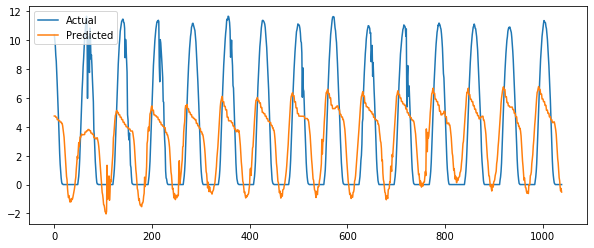

In [102]:
plot_MAPE(y_test,y_pred)

In [103]:
results = SVM_rbf(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 5.290508459865406
Root Mean squared error using SVM on test data: 4.59094964199021
Root Mean squared error using SVM on test data: 2.7755796460389206
Root Mean squared error using SVM on test data: 2.6485701717077017
Root Mean squared error using SVM on test data: 2.628608527976233
Root Mean squared error using SVM on test data: 2.646217086293505
Root Mean squared error using SVM on test data: 2.7385009375519154
Optimal C: 10
optimal RMSE: 2.628608527976233


Root Mean squared error using SVM : 2.628608527976233


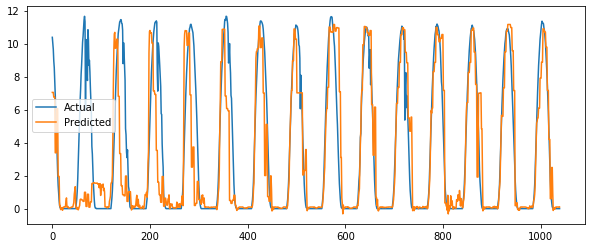

In [104]:
plot_MAPE(y_test,y_pred)

### Using time of the Day, Energy and Temperature for prediction
<h5>X_train -> Time, Energy, Temperature</h5>
<h5>Y_train -> Predicted_Energy</h5>

In [104]:
time = []
for i in range(0,total_months*30):
    for j in energy.columns:
        time.append(j)

In [105]:
data.head()

,Temperature,Energy,Predicted_Energy
0,87.71,0.0,11.100
1,87.71,0.0,10.552
2,87.71,0.0,9.980
3,87.80,0.0,9.095
4,87.80,0.0,8.643


In [106]:
time = time[:len(time)-k]

In [107]:
len(time)

4280

In [108]:
data['Time'] = time

In [109]:
data.head()

,Temperature,Energy,Predicted_Energy,Time
0,87.71,0.0,11.100,00:00
1,87.71,0.0,10.552,00:20
2,87.71,0.0,9.980,00:40
3,87.80,0.0,9.095,01:00
4,87.80,0.0,8.643,01:20


In [110]:
# converting the data into one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Time'].values.reshape(-1,1))
X = enc.transform(data['Time'].values.reshape(-1,1))

In [111]:
X.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
day_d = pd.DataFrame(X.todense())

In [113]:
data = pd.concat([data,day_d],axis=1)

In [114]:
data.head()

,Temperature,Energy,Predicted_Energy,Time,0,1,2,3,4,5,...,62,63,64,65,66,67,68,69,70,71
0,87.71,0.0,11.100,00:00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87.71,0.0,10.552,00:20,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87.71,0.0,9.980,00:40,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87.80,0.0,9.095,01:00,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,87.80,0.0,8.643,01:20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
data = data.drop(['Time'],axis=1)

In [116]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]

In [117]:
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

In [118]:
X_train.head()

,Temperature,Energy,0,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,71
0,87.71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87.71,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87.71,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,87.80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3240, 74), (1040, 74), (3240,), (1040,))

In [121]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 3.2925255760987504
Root Mean squared error using SVM on test data: 2.918785242975769
Root Mean squared error using SVM on test data: 0.6797580347127159
Root Mean squared error using SVM on test data: 0.45925740522217634
Root Mean squared error using SVM on test data: 0.4605014363210272
Root Mean squared error using SVM on test data: 0.9013219334506235
Root Mean squared error using SVM on test data: 15.99488583215821
Optimal C: 1
optimal RMSE: 0.45925740522217634


Root Mean squared error using SVM : 0.45925740522217634


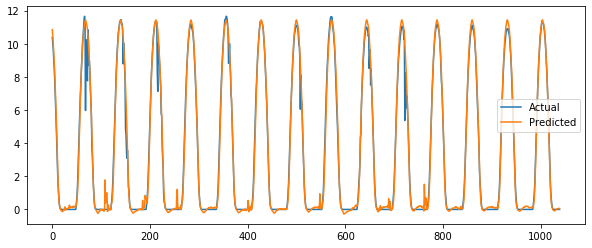

In [123]:
plot_MAPE(y_test,y_pred)

In [124]:
results = SVM_rbf(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 5.040429086995639
Root Mean squared error using SVM on test data: 3.3081168923093562
Root Mean squared error using SVM on test data: 2.8058563454489143
Root Mean squared error using SVM on test data: 2.444126985586149
Root Mean squared error using SVM on test data: 1.2261699143413458
Root Mean squared error using SVM on test data: 0.9778222435300838
Root Mean squared error using SVM on test data: 0.990613250169141
Optimal C: 100
optimal RMSE: 0.9778222435300838


Root Mean squared error using SVM : 0.9778222435300838


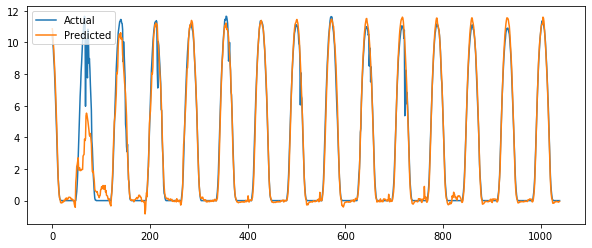

In [126]:
plot_MAPE(y_test,y_pred)

### Applying SVM

## Using Temperature, Time, Previous Energy Produced, Humidity 
<h5>X_train -> Temperature, Time, Humidity</h5>
<h5>Y_train -> Energy</h5>

In [120]:
data['humidity']  = hum[:len(hum)-k]

In [121]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,63,64,65,66,67,68,69,70,71,humidity
0,87.71,0.0,11.100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58
1,87.71,0.0,10.552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58
2,87.71,0.0,9.980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58
3,87.80,0.0,9.095,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
4,87.80,0.0,8.643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51


In [122]:
X_train = data.drop(['Predicted_Energy'],axis=1).iloc[:day_reading]
y_train = data['Predicted_Energy'].iloc[:day_reading]
X_test = data.drop(['Predicted_Energy'],axis=1).iloc[day_reading:]
y_test = data['Predicted_Energy'].iloc[day_reading:]

In [131]:
results = SVM_rbf(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 5.040732331746203
Root Mean squared error using SVM on test data: 3.310817461597945
Root Mean squared error using SVM on test data: 2.8020058911256385
Root Mean squared error using SVM on test data: 2.4318466197766555
Root Mean squared error using SVM on test data: 1.215808351985728
Root Mean squared error using SVM on test data: 0.9657279325629455
Root Mean squared error using SVM on test data: 0.9515866403977304
Optimal C: 1000
optimal RMSE: 0.9515866403977304


Root Mean squared error using SVM : 0.9515866403977304


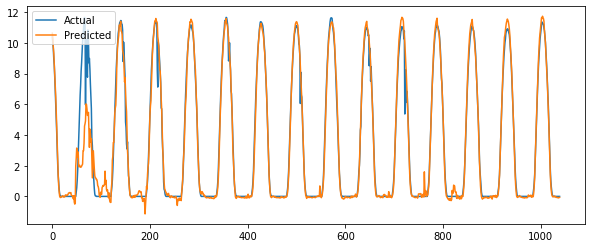

In [132]:
plot_MAPE(y_test,y_pred)

In [133]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 3.2904449664812794
Root Mean squared error using SVM on test data: 2.905673849227174
Root Mean squared error using SVM on test data: 0.666080746733043
Root Mean squared error using SVM on test data: 0.45963653330779575
Root Mean squared error using SVM on test data: 0.4575811916174639
Root Mean squared error using SVM on test data: 0.6801459341575817
Root Mean squared error using SVM on test data: 6.275956700581102
Optimal C: 10
optimal RMSE: 0.4575811916174639


Root Mean squared error using SVM : 0.4575811916174639


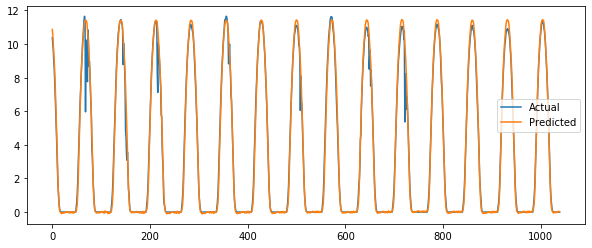

In [134]:
plot_MAPE(y_test,y_pred)

In [ ]:
results = SVM_poly(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 0.7584543899488828
Root Mean squared error using SVM on test data: 0.6475665434762173
Root Mean squared error using SVM on test data: 0.6043079777874846
Root Mean squared error using SVM on test data: 1.325000046273696
Root Mean squared error using SVM on test data: 13.653990088175952


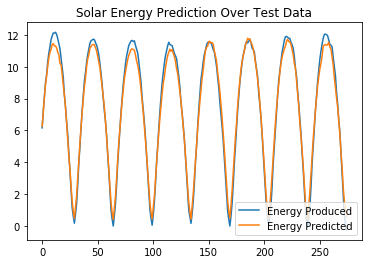

Mean squared error using SVM on Test: 0.4233831629565547
MAPE using SVM : 11.325466067183829


In [415]:
plot_MAPE(y_test,y_opt)

## Time, Humidity, Temperature

In [123]:
X_train = data.drop(['Predicted_Energy','Energy'],axis=1).iloc[:day_reading]
y_train = data['Predicted_Energy'].iloc[:day_reading]
X_test = data.drop(['Predicted_Energy','Energy'],axis=1).iloc[day_reading:]
y_test = data['Predicted_Energy'].iloc[day_reading:]

In [127]:
results = SVM_rbf(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 5.274133644717207
Root Mean squared error using SVM on test data: 4.77052433831773
Root Mean squared error using SVM on test data: 4.335583468112166
Root Mean squared error using SVM on test data: 3.965285349440076
Root Mean squared error using SVM on test data: 1.569657015307167
Root Mean squared error using SVM on test data: 1.1095834102759259
Root Mean squared error using SVM on test data: 1.0371967750697748
Optimal C: 1000
optimal RMSE: 1.0371967750697748


Root Mean squared error using SVM : 1.0371967750697748


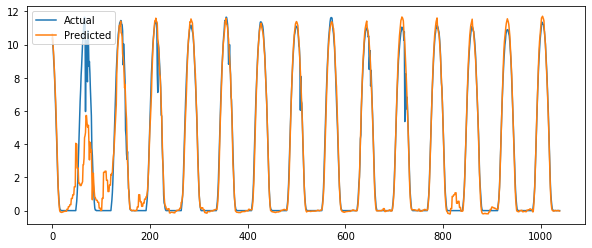

In [128]:
plot_MAPE(y_test,y_pred)

In [129]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 5.295589841002672
Root Mean squared error using SVM on test data: 4.846127924703683
Root Mean squared error using SVM on test data: 1.5618978334815783
Root Mean squared error using SVM on test data: 0.43481587342209854
Root Mean squared error using SVM on test data: 0.4571572873560655
Root Mean squared error using SVM on test data: 0.7343162500851657
Root Mean squared error using SVM on test data: 6.321595305222689
Optimal C: 1
optimal RMSE: 0.43481587342209854


In [130]:
plot_MAPE(y_test,y_opt)

NameError: name 'y_opt' is not defined

## Applying VAR Model

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
%matplotlib inline

In [217]:
#johan_test_temp = data
#coint_johansen(johan_test_temp,-1,1).eig

1. From the above result we can see that eigen values are less then 1 so our data is stationary

In [218]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,27,28,29,30,31,32,33,34,humidity,Humidity
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.51
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.48


In [219]:
data1 = data[['Temperature','Energy','Humidity','Predicted_Energy']]

In [220]:
#creating the train and validation set
train = data1[:int(0.8*(len(data1)))]
test = data1[int(0.8*(len(data1))):]

In [221]:
train.shape,test.shape

((839, 4), (210, 4))

In [222]:
#fit the model
model = VAR(endog=train)
model_fit = model.fit()

In [223]:
model_fit.y

array([[ 84.88 ,   0.706,   0.51 ,   1.366],
       [ 84.65 ,   1.366,   0.49 ,   2.404],
       [ 84.65 ,   2.404,   0.49 ,   3.546],
       ...,
       [108.68 ,   2.456,   0.17 ,   1.452],
       [108.68 ,   1.452,   0.17 ,   0.8  ],
       [108.68 ,   0.8  ,   0.17 ,   0.391]])

In [224]:
# make prediction on the test dataset
prediction = model_fit.forecast(model_fit.y, steps=len(test))

In [225]:
#converting predictions to pandas dataframe
import math
from sklearn.metrics import mean_squared_error
pred = pd.DataFrame(index=range(0,len(prediction)),columns=data1.columns)
for j in range(0,4):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

In [226]:
pred

,Temperature,Energy,Humidity,Predicted_Energy
0,104.091,0.391,0.253762,-0.0477298
1,100.619,-0.0477298,0.317583,-0.194189
2,97.2483,-0.194189,0.379848,-0.0807522
3,94.132,-0.0807522,0.43768,0.267449
4,91.3547,0.267449,0.489447,0.818674
5,88.9838,0.818674,0.533831,1.53684
6,87.0671,1.53684,0.569884,2.38312
7,85.6324,2.38312,0.597029,3.3175
8,84.6883,3.3175,0.615049,4.30034
9,84.226,4.30034,0.624064,5.29361


In [227]:
#printing the rmse of the model
for i in ['Temperature','Predicted_Energy']:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for Temperature is :  9.684142054334377
rmse value for Predicted_Energy is :  3.387098237886395


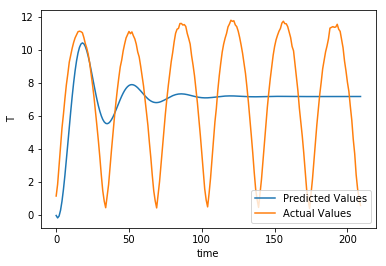

In [228]:
import matplotlib.pyplot as plt
plt.plot(pred['Predicted_Energy'].values)
plt.plot(test['Predicted_Energy'].values)
plt.xlabel("time")
plt.ylabel("T")
plt.legend(["Predicted Values","Actual Values"])

## adding cloud cover as one of the feature

In [131]:
data['cloudcover'] = cloud[:len(cloud)-k]

In [132]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

In [134]:
results = SVM_rbf(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 5.041068621974188
Root Mean squared error using SVM on test data: 3.311709283896467
Root Mean squared error using SVM on test data: 2.803151862040952
Root Mean squared error using SVM on test data: 2.434565141997169
Root Mean squared error using SVM on test data: 1.2122884928790845
Root Mean squared error using SVM on test data: 0.9638660196353895
Root Mean squared error using SVM on test data: 0.986378708145068
Optimal C: 100
optimal RMSE: 0.9638660196353895


Root Mean squared error using SVM : 0.9638660196353895


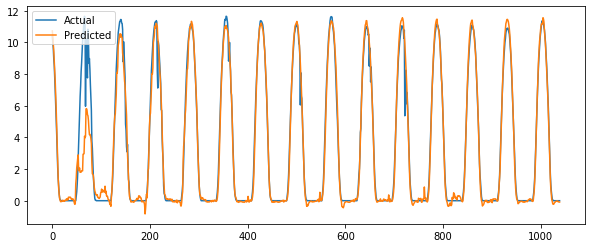

In [135]:
plot_MAPE(y_test,y_pred)

In [136]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 3.290666827669159
Root Mean squared error using SVM on test data: 2.9047977482290235
Root Mean squared error using SVM on test data: 0.6660159996228164
Root Mean squared error using SVM on test data: 0.4577797619190149
Root Mean squared error using SVM on test data: 0.4487663011410341
Root Mean squared error using SVM on test data: 0.6321447951811564
Root Mean squared error using SVM on test data: 5.650705991447457
Optimal C: 10
optimal RMSE: 0.4487663011410341


Root Mean squared error using SVM : 0.4487663011410341


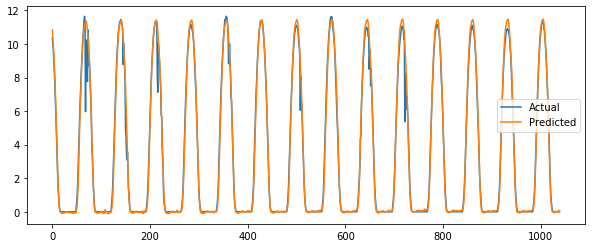

In [138]:
plot_MAPE(y_test,y_pred)

### Adding dewPoint as a feature 

In [139]:
data['dewPoint'] = dewpoint[:len(dewpoint)-k]

In [140]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,65,66,67,68,69,70,71,humidity,cloudcover,dewPoint
0,87.71,0.0,11.100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33
1,87.71,0.0,10.552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33
2,87.71,0.0,9.980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33
3,87.80,0.0,9.095,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0,67.64
4,87.80,0.0,8.643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0,67.64


In [141]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

In [142]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 3.390028529313798
Root Mean squared error using SVM on test data: 2.988988899349186
Root Mean squared error using SVM on test data: 0.6871982549036182
Root Mean squared error using SVM on test data: 0.4557570291406445
Root Mean squared error using SVM on test data: 0.45029107634241783
Root Mean squared error using SVM on test data: 0.7406280621956758
Root Mean squared error using SVM on test data: 5.461317747263081
Optimal C: 10
optimal RMSE: 0.45029107634241783


Root Mean squared error using SVM : 0.45029107634241783


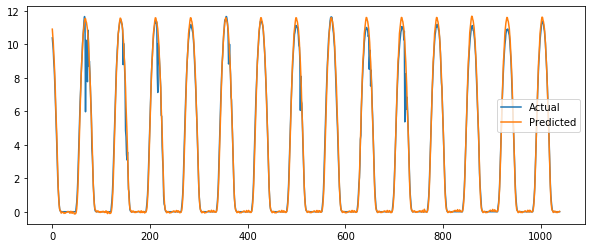

In [143]:
plot_MAPE(y_test,y_pred)

## Time, Temperature, Humidity, Previous Energy, Dew Point
### (REMOVING CLOUD COVER FEATURE)

In [144]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [145]:
X_train.head()

,Temperature,Energy,0,1,2,3,4,5,6,7,...,64,65,66,67,68,69,70,71,humidity,dewPoint
0,87.71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,71.33
1,87.71,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,71.33
2,87.71,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,71.33
3,87.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,67.64
4,87.80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,67.64


In [146]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 3.389940839323191
Root Mean squared error using SVM on test data: 2.9883541609151
Root Mean squared error using SVM on test data: 0.6860319643419281
Root Mean squared error using SVM on test data: 0.4558934722820657
Root Mean squared error using SVM on test data: 0.45024689324099904
Root Mean squared error using SVM on test data: 0.842647446770294
Root Mean squared error using SVM on test data: 7.5280783895962
Optimal C: 10
optimal RMSE: 0.45024689324099904


Root Mean squared error using SVM : 0.45024689324099904


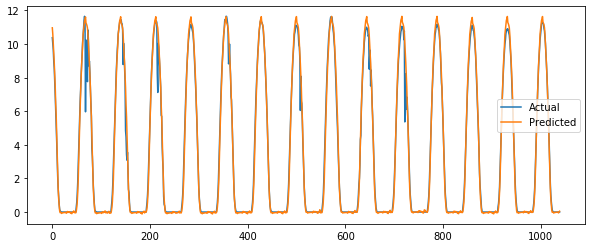

In [147]:
plot_MAPE(y_test,y_pred)

## Adding Wind Speed to the model

In [148]:
data['windSpeed'] = windspeed[:len(windspeed)-k]

In [149]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,66,67,68,69,70,71,humidity,cloudcover,dewPoint,windSpeed
0,87.71,0.0,11.100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33,7.41
1,87.71,0.0,10.552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33,7.41
2,87.71,0.0,9.980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33,7.41
3,87.80,0.0,9.095,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0,67.64,7.82
4,87.80,0.0,8.643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0,67.64,7.82


In [150]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)  # adding cloud cover decreasing the rmse score so removing it from the feature set
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [151]:
X_train.head()

,Temperature,Energy,0,1,2,3,4,5,6,7,...,65,66,67,68,69,70,71,humidity,dewPoint,windSpeed
0,87.71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,71.33,7.41
1,87.71,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,71.33,7.41
2,87.71,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,71.33,7.41
3,87.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,67.64,7.82
4,87.80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,67.64,7.82


In [153]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 3.365009222991047
Root Mean squared error using SVM on test data: 2.976487590043393
Root Mean squared error using SVM on test data: 0.6898904446485569
Root Mean squared error using SVM on test data: 0.4573968477974967
Root Mean squared error using SVM on test data: 0.44791314558175177
Root Mean squared error using SVM on test data: 0.8269345202251805
Root Mean squared error using SVM on test data: 7.201515917807407
Optimal C: 10
optimal RMSE: 0.44791314558175177


Root Mean squared error using SVM : 0.44791314558175177


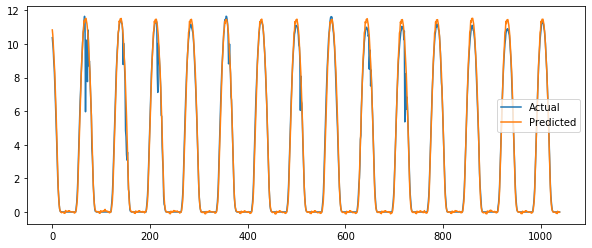

In [156]:
plot_MAPE(y_test,y_pred)

### Adding windBearing as a feature

In [157]:
data['windBearing'] = wBearing[:len(wBearing)-k]

In [158]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,67,68,69,70,71,humidity,cloudcover,dewPoint,windSpeed,windBearing
0,87.71,0.0,11.100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33,7.41,223
1,87.71,0.0,10.552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33,7.41,223
2,87.71,0.0,9.980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.58,0.0,71.33,7.41,223
3,87.80,0.0,9.095,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.51,0.0,67.64,7.82,234
4,87.80,0.0,8.643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.51,0.0,67.64,7.82,234


In [159]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)  # adding cloud cover decreasing the rmse score so removing it from the feature set
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [160]:
results = SVM_Linear(X_train,X_test,y_train,y_test)
y_pred,opt_v = results[0],results[1]
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 3.7823401296064
Root Mean squared error using SVM on test data: 3.304978354754245
Root Mean squared error using SVM on test data: 0.7595937780873426
Root Mean squared error using SVM on test data: 0.4546203530273493
Root Mean squared error using SVM on test data: 0.6154672939421938
Root Mean squared error using SVM on test data: 4.256221229659045


KeyboardInterrupt: 

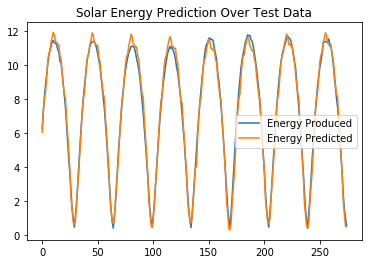

Mean squared error using SVM : 0.3460472333971547
MAPE using SVM : 6.8711741587226145


In [251]:
plot_MAPE(y_test,y_pred)

### Removing Energy as a feature

In [252]:
train = data.iloc[:day_reading]
test = data.iloc[day_reading:]
X_train = train.drop(['Predicted_Energy','Energy'],axis=1)  # adding cloud cover decreasing the rmse score so removing it from the feature set
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','Energy'],axis=1)
y_test = test['Predicted_Energy']

In [253]:
results = SVM_linear(X_train,X_test,y_train,y_test)
print("Optimal C:",results[2])
print("optimal RMSE:",results[1])

Root Mean squared error using SVM on test data: 2.3113203899884156
Root Mean squared error using SVM on test data: 2.184926690410175
Root Mean squared error using SVM on test data: 1.1667852880125669
Root Mean squared error using SVM on test data: 0.39622446012315843
Root Mean squared error using SVM on test data: 0.5282417310061528
Root Mean squared error using SVM on test data: 4.077779298785611


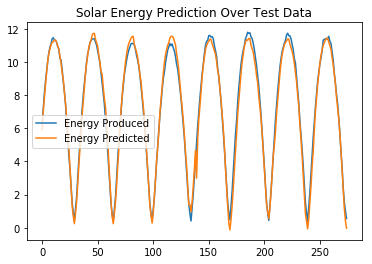

Mean squared error using SVM : 0.39622446012315843
MAPE using SVM : 8.985136090997136


In [254]:
plot_MAPE(y_test,y_opt)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))